# Data Visualization Part 1

In [5]:
# Adding the neccecary imports to our code
import pandas as pd
import re
import numpy as np
import math
from collections import deque

In [6]:
#type of data:
#We chose the dataset: 
#loading the file and extracting the nodes and edges:
url_Les_Miserables_network  = '../data/LesMiserables.dot'
url_Rome_graph  = '../data/rome.dot'
url_Jazz_Network  = '../data/JazzNetwork.dot'
url_Small_Directed_Network  = '../data/noname.dot'
url_Pro_League_Network  = '../data/LeagueNetwork.dot'
url_Argumentation_network  = '../data/devonshiredebate_withclusters.dot'
url_Political_blogosphere_network  = '../data/polblogs.dot'

In [12]:
import pydot
G = pydot.graph_from_dot_file(url_Jazz_Network)[0]
vertices = [n.get_name() for n in G.get_node_list()]


# for n in G.get_node_list():
#     print(f"Found node with id {n.get_name()}")
# for e in G.get_edge_list():
#     print(f"Edge from {e.get_source()} to {e.get_destination()}")
    
# Visualize the graph
graph_list = []
for vertex in vertices:
    graph = Graph(vertex)
    for edge in G.get_edge_list():
        if vertex == edge.get_source():
            graph.add_edge(edge.get_source(),edge.get_destination())
    graph_list.append(graph)

# Display graph
for graph in graph_list:
    print(graph)

KeyboardInterrupt: 

In [8]:
#creating the data structure and apply this structure on the data:
class Graph:
    def __init__(self, vertex, edges=None):
        self.vertex = vertex
        self.edges = edges if edges else []
        self.rank = len(self.edges)

    def add_edge(self, source, target):
        if source == self.vertex:
            self.edges.append(target)
            self.rank+=1
    def __str__(self):
        result = f"{self.vertex}: {self.edges} and the degree of {self.rank}\n"
        return result

In [48]:
# Example usage:



1: ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9'] and the degree of 23

10: ['109', '111', '112', '114', '119', '12', '125', '13', '14', '145', '146', '147', '149', '15', '153', '155', '158', '159', '160', '164', '165', '17', '18', '19', '20', '28', '3', '5', '54', '6', '67', '7', '74', '75', '76', '80', '83', '85', '86', '88', '93'] and the degree of 41

100: ['102', '103', '105', '106', '107', '108', '109', '110', '111', '116', '117', '118', '119', '138', '139', '154', '26', '54', '55', '75', '80', '81', '82', '84', '86', '87', '89', '90', '91', '93', '94', '95', '96', '98', '99'] and the degree of 35

101: ['102', '107', '116', '117', '118', '126', '128', '131', '132', '133', '134', '137', '152', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '187', '188', '189', '31', '80', '89', '90', '91', '95', '96', '97'] and the degree of 35

102: ['105', '107', '108', '113', '116'

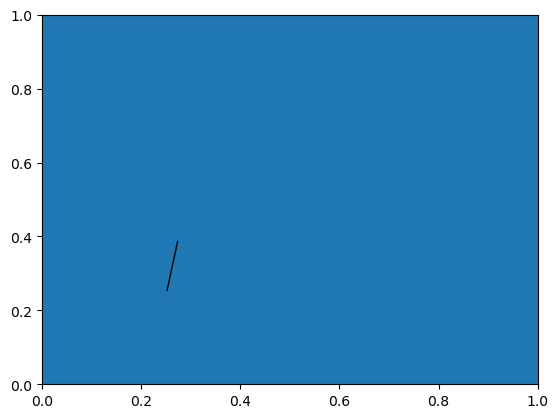

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle,ConnectionPatch
import numpy as np
fig = plt.figure()
ax = fig.gca()
#Generate the circle's position somehow
pos_circle = np.random.rand(2)
ax.add_patch(Circle(pos_circle,radius=5))
ax.add_patch(ConnectionPatch(pos_circle,np.random.rand(2), 'data'))